In [1]:
import pandas as pd
import numpy as np
import shmapy

In [2]:
states = pd.DataFrame(pd.read_csv('../static/demo_input1.csv')['state'])
states['values'] = np.random.random(states.shape[0])
states.head()

,state,values
0,AK,0.234248
1,AL,0.574742
2,AR,0.492913
3,AZ,0.984303
4,CA,0.299015


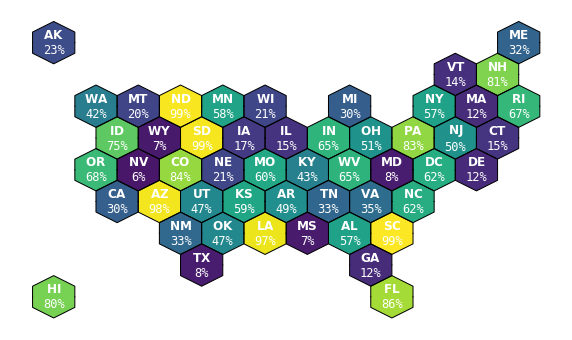

In [3]:
shmapy.us_plot_hex(
    states, 
    chart_type='choropleth', 
    numeric_labels='all',
    line_color='black',
    figsize=(10,6),
    size=12
)

In [4]:
states['category'] = np.random.choice(['Apple', 'Cherry' ,'Banana', 'Durian'], states.shape[0])
states.head()
states['values_label'] = np.round(states['values']*100).astype(int).astype(str) + '%'
states.head()

,state,values,category,values_label
0,AK,0.234248,Cherry,23%
1,AL,0.574742,Banana,57%
2,AR,0.492913,Durian,49%
3,AZ,0.984303,Apple,98%
4,CA,0.299015,Cherry,30%


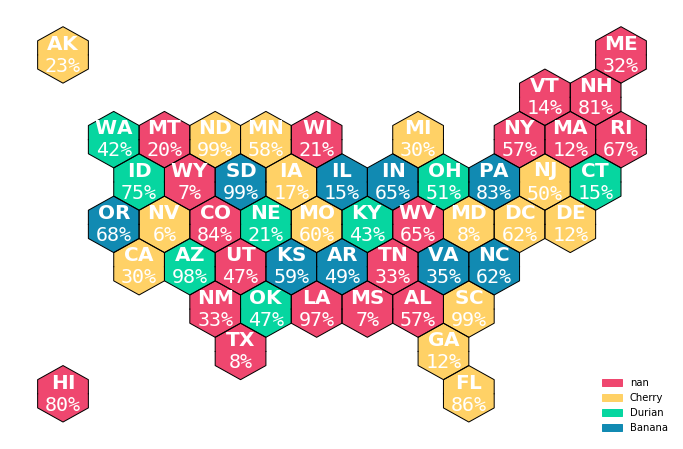

In [6]:
category_labels = {
    'Banana':'red',
    'Cherry': 'blue',
    'Apple': 'green',
    'Durian': 'purple'
}

shmapy.us_plot_hex(
    states[['state', 'category', 'values_label']], 
    size = 20, 
    chart_type='categorical', 
    line_color='black', 
    numeric_labels_custom='values_label',
    category_labels=['Banana','Cherry', 'Apple','Durian'],
    fill_color = ['#ef476f', '#ffd166', '#06d6a0', '#118ab2'],
    figsize=(12, 8)
)

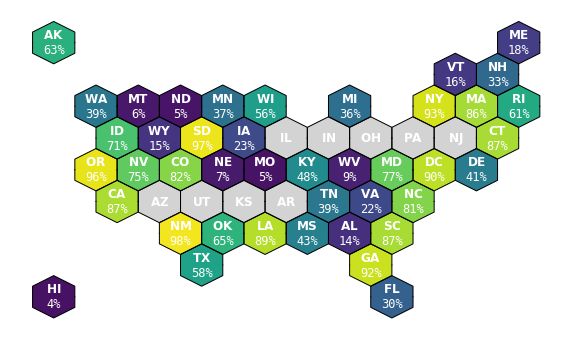

In [10]:
states = pd.DataFrame(pd.read_csv('../static/demo_input4.csv')['state'])
states['values'] = np.random.random(states.shape[0])

shmapy.us_plot_hex(
    states, 
    chart_type='choropleth', 
    numeric_labels='all',
    line_color='black',
    missing_text_color= 'white',
    missing_fill_color = 'lightgrey',
#     text_color='black',
    figsize=(10,6),
    size=12
)


## Facet Shmap

In [84]:
import matplotlib.pyplot as plt
import shmapy.facet_shmap

states = pd.DataFrame(np.repeat(list(shmapy.facet_shmap.get_state_coordinates()['code']), 20)).rename(columns={0:'state'})

states['x'] = np.random.random(states.shape[0])
states['y'] = np.random.random(states.shape[0]) + (1 * states.index)
states['color'] = np.random.choice(['#ef476f', '#ffd166', '#06d6a0', '#118ab2'], states.shape[0])
pa = states.loc[states.state=='PA']

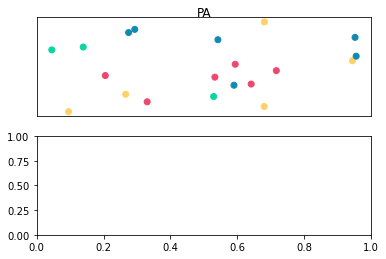

In [87]:
fig, ax = plt.subplots(2,1)

def scatter_a_state(ax, df):
    
    state_name = list(df.state)[0]
    
    ax.scatter(df.x, df.y, color=df.color)
    ax.set_title(state_name,loc='center', size=12, y=.95)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

scatter_a_state(ax[0], pa)

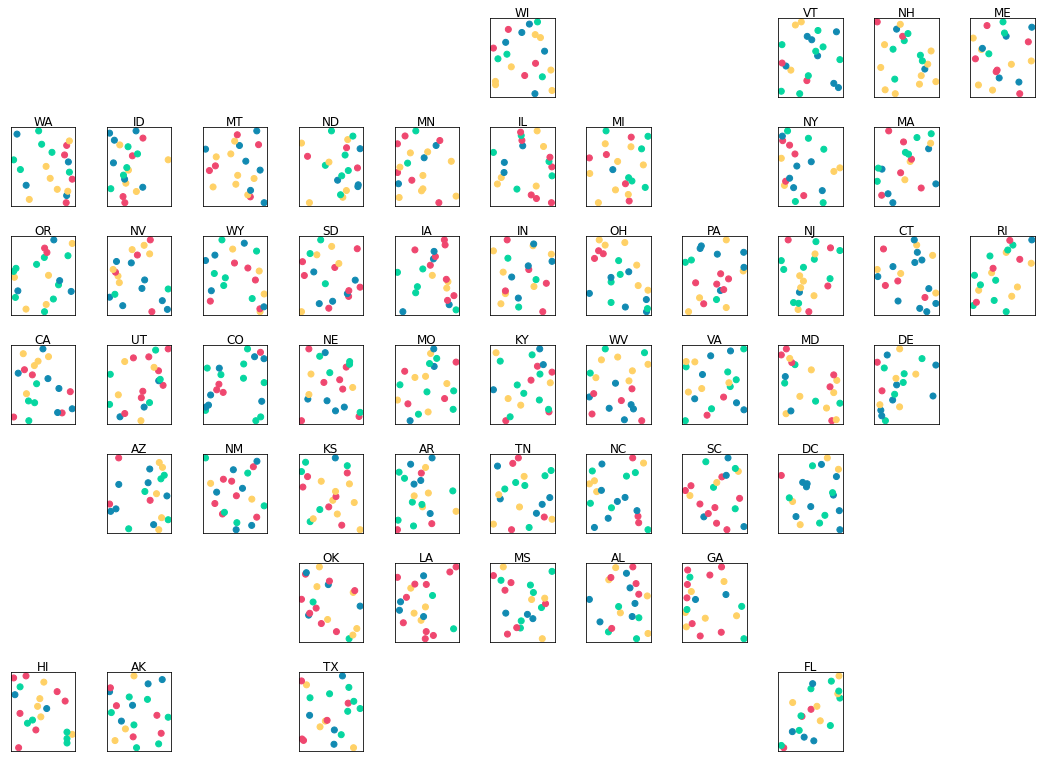

In [88]:
shmapy.facet_shmap.facet_plot_us(states, scatter_a_state, facet_col='state')

In [79]:
sub_shmap = df_shmap.loc[lambda x: x.facility_state=='PA']

def state_positivity_plot(ax, df, max_tests, max_positivity, date_range):
    
    state=max(df.facility_state)
    
    df_small = (df
     .groupby('date_of_testing').agg({'tests': sum, 'positive_tests': sum, '2018 Population' : max})
     .reset_index()
     .assign(
         positivity = lambda x: x.positive_tests/ x.tests,
         tests_per_100k = lambda x: x.tests / x['2018 Population'] * 100000
     )
     .reset_index()
    )
    ax.set_xlim(date_range)
    ax2 = ax.twinx()
    ax.grid(False)
    ax2.grid(False)
    
    ax.bar(
        df_small['date_of_testing'],
        df_small['tests_per_100k'],
    )
    
    ax.get_xaxis().set_ticks([])
    ax.set_ylim(top=max_tests)
    ax.set_title(state,loc='center', y=.95)
    ax.tick_params(axis="both", which="both", length=0, labelsize=12)
    
    
    ax2.plot(
        df_small['date_of_testing'],
        df_small['positivity'],
        linewidth=3,
        color='red'
    )
    
    ax.set_facecolor("#EAEAF2")
    
    for child in ax2.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('black')
    
#     if state in ['CO','PA','MI']:
#         ax.set_facecolor('pink')
#         for child in ax2.get_children():
#             if isinstance(child, matplotlib.spines.Spine):
#                 child.set_color('black')

    ax2.tick_params(axis="both", which="both", length=0, labelsize=12)
    ax2.grid(False)
    ax2.get_xaxis().set_ticks([])
    ax2.get_yaxis().set_ticks([])
    ax2.set_ylim(bottom=-.01,top=max_positivity)
    ax2.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))
    ax2.tick_params(axis="both", which="both", length=0, labelsize=12)
    
max_tests=max(df_shmap.groupby(['date_of_testing', 'State'])['tests'].sum())
max_positivity=.5  
date_range= [min(df_shmap['date_of_testing']) - pd.DateOffset(1), max(df_shmap['date_of_testing']) + pd.DateOffset(1)]

test_per_100k_map = max((df_shmap
 .groupby(['State', 'date_of_testing', '2018 Population'])['tests']
 .sum()
 .reset_index()
 .assign(test_per_100k = lambda x: x.tests/ x['2018 Population'] * 100000)
 .groupby('State')['test_per_100k'].max()
))


# fig,ax= plt.subplots(2,1)
# state_positivity_plot(ax[0],
#                       sub_shmap,
#                       max_tests=max_tests,
#                       max_positivity=max_positivity,
#                       date_range=date_range)

shmapy.facet_shmap.facet_plot_us(
    df_shmap,
    state_positivity_plot,
    facet_col='facility_state',
    figsize=(22,12),
    max_positivity=max_positivity,
    max_tests=test_per_100k_map,
    date_range = date_range,
    out_path='images/facet_shmap_over_time.png'
)
    

NameError: name 'df_shmap' is not defined